# **Date - 16/10/2023**

# **Team ID - 1056**

# **Project Title - Fake News Detection using NLP****

# **Setup**

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
sns.set_palette("bright")
from warnings import filterwarnings
filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [19]:
df = pd.read_csv("/content/Assignment-1_Data.csv", sep=';')

In [20]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6.0,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106843 entries, 0 to 106842
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      106843 non-null  int64  
 1   Itemname    106518 non-null  object 
 2   Quantity    106842 non-null  float64
 3   Date        106842 non-null  object 
 4   Price       106842 non-null  object 
 5   CustomerID  69944 non-null   float64
 6   Country     106842 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.7+ MB


In [22]:
df["Price"] = df["Price"].str.replace(",",".")
df["Price"] = df["Price"].astype("float64")

In [23]:
df.Date.unique()

array(['01.12.2010 08:26', '01.12.2010 08:28', '01.12.2010 08:34', ...,
       '06.03.2011 12:42', '06.03.2011 12:46', nan], dtype=object)

In [24]:
today = "2012-01-01"
today = pd.to_datetime(today)
df["Date"] = pd.to_datetime(df["Date"])

# Recency

In [25]:
rec_table = df.groupby(["CustomerID"]).agg({"Date": lambda x: ((today - x.max()).days)})
rec_table.columns = ["Recency"]

In [26]:
rec_table.head()

,Recency
CustomerID,
12346.0,347
12347.0,339
12350.0,332
12352.0,318
12356.0,347


# Frequency

In [27]:
freq_table = df.drop_duplicates(subset = "BillNo").groupby(["CustomerID"])[["BillNo"]].count()
freq_table.columns = ["Frequency"]
freq_table.head()

,Frequency
CustomerID,
12346.0,1
12347.0,2
12350.0,1
12352.0,3
12356.0,1


# Monetary

In [28]:
df["Total_Price"] = df["Quantity"] * df["Price"]

In [29]:
monetary_table = df.groupby(["CustomerID"])[["Total_Price"]].sum()
monetary_table.columns = ["Monetary"]
monetary_table.head()

,Monetary
CustomerID,
12346.0,77183.60
12347.0,1187.18
12350.0,334.40
12352.0,1281.15
12356.0,2271.62


In [31]:
rfm_data = pd.concat([rec_table, freq_table, monetary_table], axis = 1)
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,339,2,1187.18
12350.0,332,1,334.40
12352.0,318,3,1281.15
12356.0,347,1,2271.62


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,339,2,1187.18
12350.0,332,1,334.40
12352.0,318,3,1281.15
12356.0,347,1,2271.62


In [32]:
rfm_data.describe()

,Recency,Frequency,Monetary
count,1748.000000,1748.000000,1748.000000
mean,320.481693,2.021167,928.024949
std,148.037292,2.450683,3086.977027
min,30.000000,1.000000,0.850000
25%,272.000000,1.000000,210.810000
50%,320.000000,1.000000,391.810000
75%,363.000000,2.000000,816.055000
max,718.000000,44.000000,77183.600000


# CLUSTERING

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

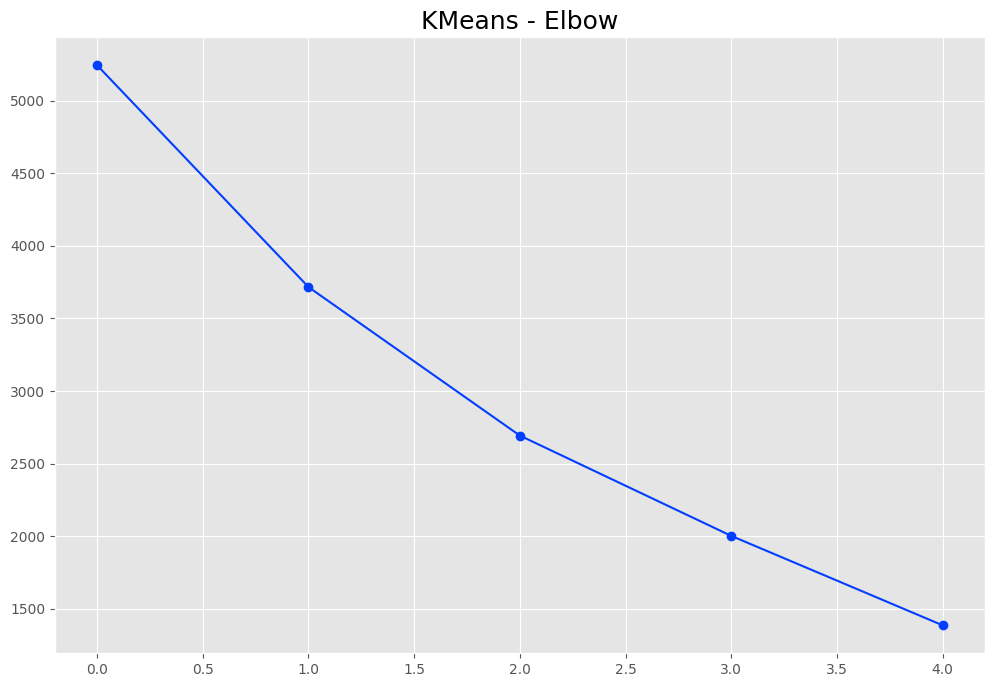

In [34]:
inertia = []

from sklearn.cluster import KMeans
for i in np.arange(1,6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (12,8))
plt.plot(inertia, marker = "o")
plt.title("KMeans - Elbow", fontsize = 18);

In [35]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(rfm_scaled)
rfm_data["Cluster_No"] = (kmeans.labels_ + 1)

In [37]:
rfm_data.head()

,Recency,Frequency,Monetary,Cluster_No
CustomerID,,,,
12346.0,347,1,77183.60,2
12347.0,339,2,1187.18,1
12350.0,332,1,334.40,1
12352.0,318,3,1281.15,1
12356.0,347,1,2271.62,1
